
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [124]:

import numpy as np
import matplotlib.pyplot as plt


In [125]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
# Defining the standard scaler.
class StandardScalerManual:
    def fit(self, X):
        X=np.asarray(X)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self

    def transform(self, X):
        X=np.asarray(X,dtype=float)
        scaled_x= (X - self.mean) / self.std
        return scaled_x

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [126]:
# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used

# Defining the Linear Regression
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0.0

        for i in range(self.epochs):
          y_pred=np.dot(X,self.weights)+self.bias
          loss=np.mean((y_pred-y)**2)
          dw=(2/n_samples)*np.dot(X.T,(y_pred-y))+(2*self.l2_lambda*self.weights)
          db=(2/n_samples)*np.sum(y_pred-y)

          self.weights-=self.lr*dw
          self.bias-=self.lr*db

          loss=np.mean((y_pred-y)**2)+(self.l2_lambda*np.sum(self.weights**2))
          self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


Text(0.5, 1.0, 'Synthetic Dataset')

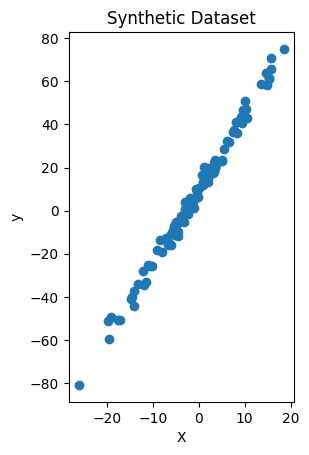

In [127]:
# Generating Synthetic Dataset.
np.random.seed(42)
X = 10*np.random.randn(100, 1)
true_weights=3.5
true_bias=10.0
noise=np.random.randn(100, 1)*3
y = (true_weights * X + true_bias + noise).flatten()

# Plotting the dataset.
plt.subplot(1,2,2)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Dataset')



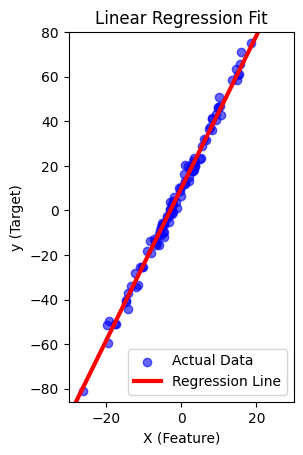

In [128]:
# Performing the linear regression on the synthetic dataset and plotting the final results
scaler=StandardScalerManual()
X_scaled=scaler.fit_transform(X)
model=LinearRegressionManual(lr=0.01,epochs=1000,l2_lambda=0.01)
model.fit(X_scaled,y)

y_pred=model.predict(X_scaled)

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
X_line = np.linspace(-80, 80, 20).reshape(-1, 1)
X_line_scaled = scaler.transform(X_line)
y_line_pred = model.predict(X_line_scaled)
plt.plot(X_line, y_line_pred, color='red', linewidth=3, label='Regression Line')

plt.xlim(-30, 30)
plt.ylim(min(y)-5, max(y)+5)

plt.title("Linear Regression Fit")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.legend()

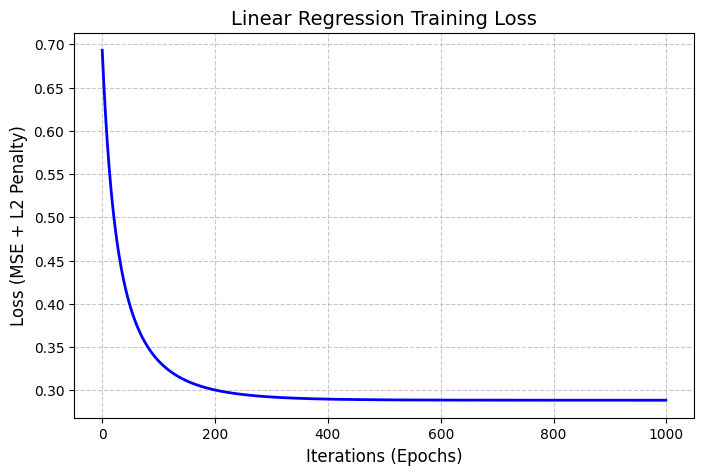

In [138]:
# Plotting the Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(model.loss_history, color='blue', linewidth=2)

plt.title("Linear Regression Training Loss", fontsize=14)
plt.xlabel("Iterations (Epochs)", fontsize=12)
plt.ylabel("Loss (MSE + L2 Penalty)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [130]:
#Implement sigmoid function as told in the lectures
# The sigmoid function:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [131]:
#Implement Logistic Regression from scratch and here also add the regularizaation term

# Logistic Regression:

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []



    def fit(self, X, y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0.0

        for i in range(self.epochs):
          linear_model=np.dot(X,self.weights)+self.bias
          y_pred=sigmoid(linear_model)

          bce_loss=-np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

          l2_loss=self.l2_lambda*np.sum(self.weights**2)
          total_loss=bce_loss+l2_loss
          self.loss_history.append(total_loss)

          dw=(1/n_samples)*np.dot(X.T,(y_pred-y))+(2*self.l2_lambda*self.weights)

          db=(1/n_samples)*np.sum(y_pred-y)

          self.weights-=self.lr*dw
          self.bias-=self.lr*db

    def predict_proba(self, X):
        linear_model=np.dot(X,self.weights)+self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        probability=self.predict_proba(X)
        return (probability>=0.5).astype(int)


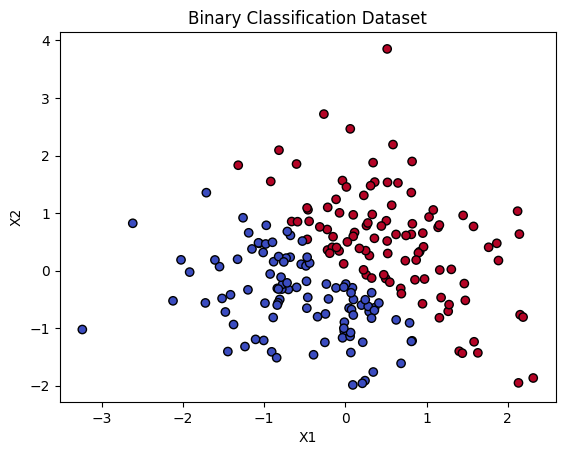

In [132]:
# Generating the Synthetic Dataset and Plotting it:

np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Binary Classification Dataset')
plt.show()


Final Accuracy Percentage: 99.5
Final Loss: 0.2886


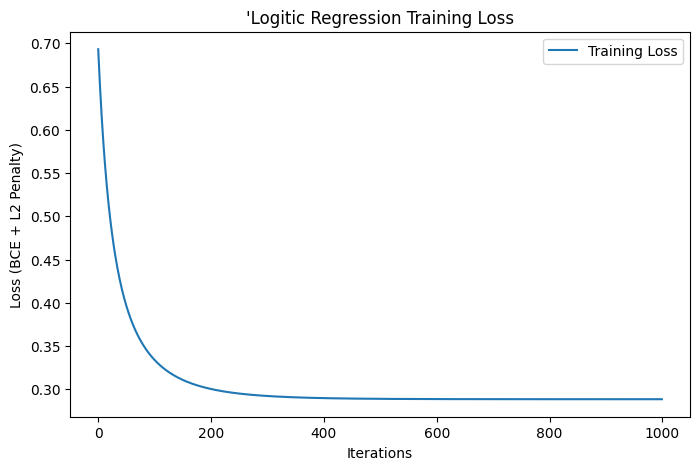

In [139]:
# Implementing the Logiistic Regression on the generated data:

model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
model.fit(X, y)

predictions = model.predict(X)
accuracy = np.mean(predictions == y)
print(f"Final Accuracy Percentage:", accuracy*100)
print(f"Final Loss: {model.loss_history[-1]:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(model.loss_history, label='Training Loss')
plt.title("'Logitic Regression Training Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss (BCE + L2 Penalty)')
plt.legend()

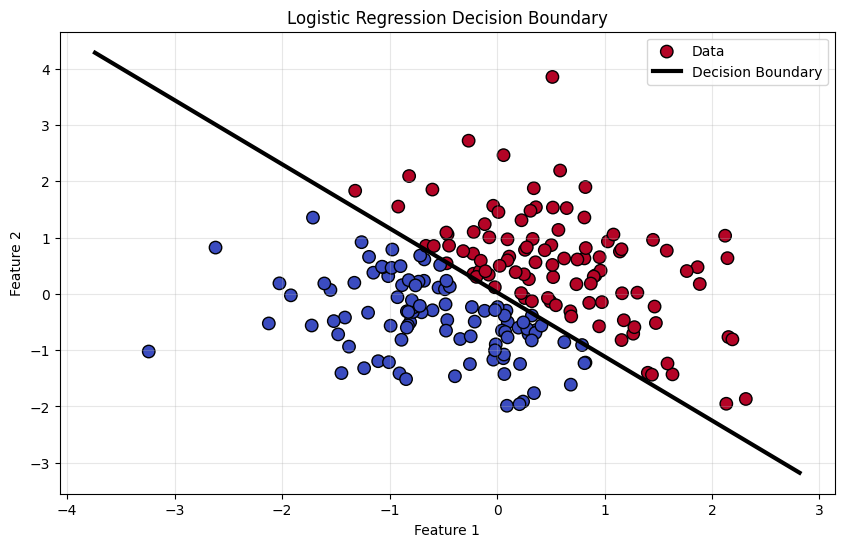

In [134]:
# Drew a Decision Line Boundary

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=80, label='Data')

w1 = model.weights[0]
w2 = model.weights[1]
b = model.bias

x_line = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)

y_line = -(w1 * x_line + b) / w2

plt.plot(x_line, y_line, 'k-', linewidth=3, label='Decision Boundary')

plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)


plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [135]:
!pip install scikit-learn
import sklearn


In [136]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !

def kmeans_matrix(M, k, max_iters=100):

    rows,cols=M.shape
    data=M.flatten()

    unique_data=np.unique(data)
    if len(unique_data)<k:
      print("Number of clusters cannot be greater than the number of unique elements")

    centroids=np.random.choice(unique_data,size=k,replace=False)

    labels=np.zeros(data.shape,dtype=int)

    for i in range(max_iters):

      distances=np.abs(data[:,np.newaxis]-centroids)
      labels=np.argmin(distances,axis=1)
      new_centroids=np.zeros(k)

      for j in range(k):
        cluster_data=data[labels==j]
        if len(cluster_data)>0:
          new_centroids[j]=np.mean(cluster_data)
        else:
          new_centroids[j]=centroids[j]

      if np.allclose(centroids,new_centroids):
        break

      centroids=new_centroids

    assignment_table=labels.reshape(rows,cols)

    cookbook={i:[] for i in range(k)}
    for r in range(rows):
      for c in range(cols):
        cluster_label=assignment_table[r,c]
        cookbook[cluster_label].append((r,c))

    return assignment_table,cookbook,centroids


In [137]:
# Creating a synthetic matrix and printing the cluster table,centrids and the cookbook.

np.random.seed(42)
M = np.random.randint(0, 50, size=(10, 10))
k = 3

assignment, cookbook, centroids = kmeans_matrix(M, k)

print("Original Matrix M:\n", M)
print("\nFinal Centroids:", np.round(centroids, 2))
print("\nAssignment Table (Cluster Labels):\n", assignment)
print("\nCookbook (Positions for Cluster 0):", cookbook[0])


Original Matrix M:
 [[38 28 14 42  7 20 38 18 22 10]
 [10 23 35 39 23  2 21  1 23 43]
 [29 37  1 20 32 11 21 43 24 48]
 [26 41 27 15 14 46 43  2 36  6]
 [20  8 38 17  3 24 13 49  8 25]
 [ 1 19 27 46  6 43  7 46 34 13]
 [16 35 49 39  3  1  5 41  3 28]
 [17 25 43 33  9 35 13 30 47 14]
 [ 7 13 22 39 20 15 44 17 46 23]
 [25 24 44 40 28 14 44  0 24  6]]

Final Centroids: [41.33 23.18  7.73]

Assignment Table (Cluster Labels):
 [[0 1 2 0 2 1 0 1 1 2]
 [2 1 0 0 1 2 1 2 1 0]
 [1 0 2 1 1 2 1 0 1 0]
 [1 0 1 2 2 0 0 2 0 2]
 [1 2 0 1 2 1 2 0 2 1]
 [2 1 1 0 2 0 2 0 0 2]
 [1 0 0 0 2 2 2 0 2 1]
 [1 1 0 0 2 0 2 1 0 2]
 [2 2 1 0 1 2 0 1 0 1]
 [1 1 0 0 1 2 0 2 1 2]]

Cookbook (Positions for Cluster 0): [(0, 0), (0, 3), (0, 6), (1, 2), (1, 3), (1, 9), (2, 1), (2, 7), (2, 9), (3, 1), (3, 5), (3, 6), (3, 8), (4, 2), (4, 7), (5, 3), (5, 5), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 7), (7, 2), (7, 3), (7, 5), (7, 8), (8, 3), (8, 6), (8, 8), (9, 2), (9, 3), (9, 6)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
